<a href="https://colab.research.google.com/github/tharaka2337/ETM4272/blob/main/Test_EGT20570_THA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

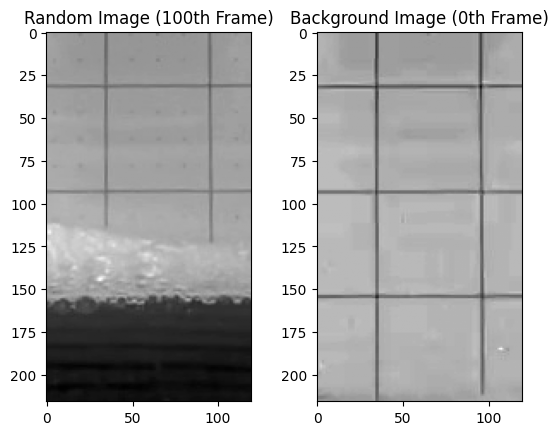

In [3]:
# Importing Demo Images
img_r = cv2.imread('/content/drive/MyDrive/liquid_frame100.jpg', 0)
img_b = cv2.imread('/content/drive/MyDrive/liquid_frame000.jpg', 0)

# Display the images
plt.subplot(121), plt.imshow(img_r, cmap='gray'), plt.title('Random Image (100th Frame)')
plt.subplot(122), plt.imshow(img_b, cmap='gray'), plt.title('Background Image (0th Frame)')
plt.show()

Threshold Value: 50.0
Contour 0 Area: 6826.0
Contour 1 Area: 0.0
Contour 2 Area: 0.0
Total Area: 25920
Percentage: 26.3 %


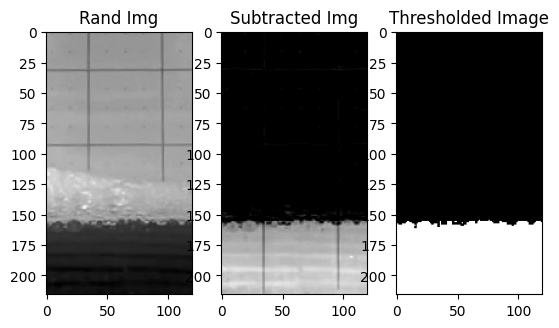

In [20]:
# Subtracting the images
img_sub = cv2.subtract(img_b, img_r)

# Thresholding the image, to obtain binary image
ret, img_sub_thresh = cv2.threshold(img_sub, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Print the used threshold value
print('Threshold Value:', ret)

# Find contours in the image
contours, hierarchy = cv2.findContours(img_sub_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours by size in descending order
contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)
# Print the contour areas
for i in range(len(contours)):
    print('Contour', i, 'Area:', cv2.contourArea(contours[i]))

# Find the area of the whole image
rows, cols = img_sub_thresh.shape
total_area = rows * cols
print('Total Area:', total_area)

# Calculate the percentage of the largest contour area, rounded to 1 decimal point
percentage = round((cv2.contourArea(contours[0]) / total_area) * 100, 1)
print('Percentage:', percentage, '%')

# Display img_r , img_sub, img_sub_thresh side by side using plt
plt.subplot(131), plt.imshow(img_r, cmap='gray'), plt.title('Rand Img')
plt.subplot(132), plt.imshow(img_sub, cmap='gray'), plt.title('Subtracted Img')
plt.subplot(133), plt.imshow(img_sub_thresh, cmap='gray'), plt.title('Thresholded Image')
plt.show()

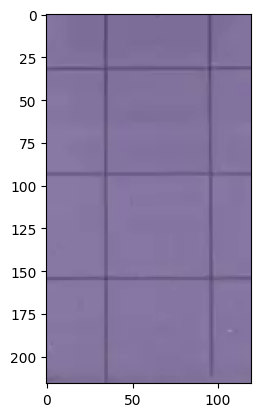

In [16]:
# Reading frames from a video
cap = cv2.VideoCapture('/content/drive/MyDrive/liquidVideo.mp4')
ret, frame1 = cap.read()

# Displaying the first frame using plt
plt.imshow(frame1)
plt.show()

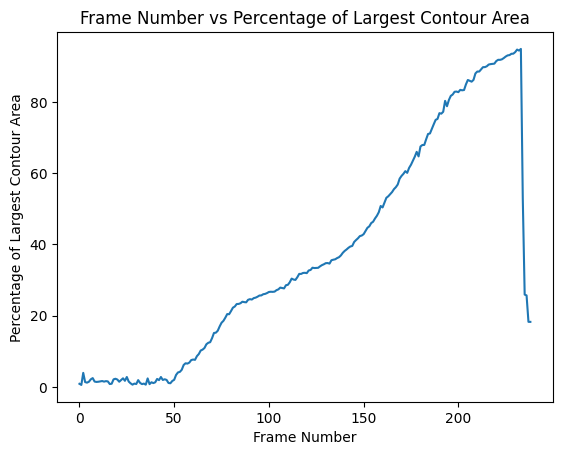

In [18]:
import cv2
import matplotlib.pyplot as plt

def process_video(video_path):
    def initialize_video(video_path):
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            raise IOError(f"Error: Unable to open video file {video_path}")
        return cap

    def get_first_frame(cap):
        ret, frame = cap.read()
        if not ret:
            raise IOError("Error: Unable to read the first frame.")
        return frame

    def process_frame(background, frame):
        # Subtract the current frame from the background
        img_sub = cv2.subtract(background, frame)

        # Convert to grayscale
        img_sub_gray = cv2.cvtColor(img_sub, cv2.COLOR_BGR2GRAY)

        # Apply threshold
        #_, img_sub_thresh = cv2.threshold(img_sub_gray, 100, 255, cv2.THRESH_BINARY)

        # Thresholding the image, to obtain binary image
        _, img_sub_thresh = cv2.threshold(img_sub_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Find contours
        contours, _ = cv2.findContours(img_sub_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        return img_sub, img_sub_thresh, contours

    def calculate_percentage(contours, frame_area):
        if contours:
            largest_contour_area = max(cv2.contourArea(c) for c in contours)
            return (largest_contour_area / frame_area) * 100
        return 0

    cap = initialize_video(video_path)
    background = get_first_frame(cap)

    frame_area = background.shape[0] * background.shape[1]
    percentages = []

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        img_sub, img_sub_thresh, contours = process_frame(background, frame)
        percentage = calculate_percentage(contours, frame_area)
        percentages.append(percentage)

        # Display the video and processed frames
        #cv2.imshow('Original Frame', frame)
        #cv2.imshow('Subtracted Frame', img_sub)
        #cv2.imshow('Thresholded Frame', img_sub_thresh)

        # Break the loop on pressing 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

    # Plot frame number vs percentage
    plt.figure()
    plt.plot(range(len(percentages)), percentages)
    plt.xlabel('Frame Number')
    plt.ylabel('Percentage of Largest Contour Area')
    plt.title('Frame Number vs Percentage of Largest Contour Area')
    plt.show()

# Call the function with the video path
video_path = '/content/drive/MyDrive/liquidVideo.mp4'
process_video(video_path)

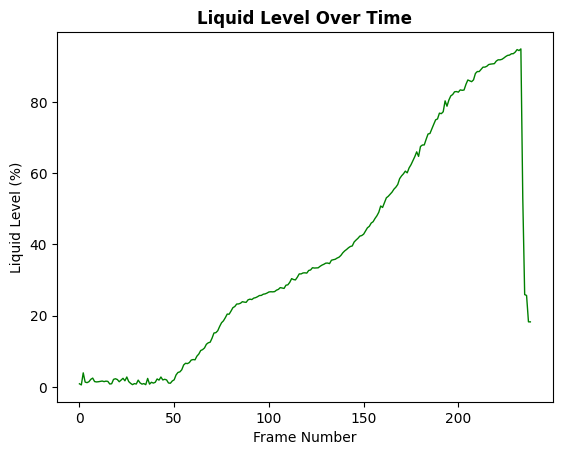

In [48]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Video path
video_path = '/content/drive/MyDrive/liquidVideo.mp4'

# Open the video
cap = cv2.VideoCapture(video_path)

# Read the first frame as background
ret, background = cap.read()

# Store liquid levels over frames
liquid_levels = []
frame_numbers = []
frame_area = background.shape[0] * background.shape[1]

frame_count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Subtract the background
    img_sub = cv2.subtract(background, frame)

    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(img_sub, cv2.COLOR_BGR2GRAY)

    # Apply thresholding
    _, img_sub_thresh = cv2.threshold(gray_frame, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find contours
    contours, _ = cv2.findContours(img_sub_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    if contours:

        largest_contour_area = max(cv2.contourArea(c) for c in contours)
        calculate_percentage = (largest_contour_area / frame_area) * 100

        liquid_levels.append(calculate_percentage)
        frame_numbers.append(frame_count)

    frame_count += 1

cap.release()

# Plot the liquid level over time
plt.plot  (frame_numbers, liquid_levels, color ='green', linewidth=1)
plt.xlabel('Frame Number')
plt.ylabel('Liquid Level (%)')
plt.title('Liquid Level Over Time', fontweight='bold')
plt.show()
